In [0]:
!pip install -q hmmlearn


In [0]:
from hmmlearn import hmm

In [0]:
import numpy as np
np.random.seed(3)

model = hmm.GaussianHMM(n_components = 2 , covariance_type ="diag")
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05],[0.15, 0.85]])
model.means_ =np.array([[1.0],[-3.0]])
model.covars_ = np.array([[15.0],[40.0]])
X, Z = model.sample(500)

AttributeError: ignored

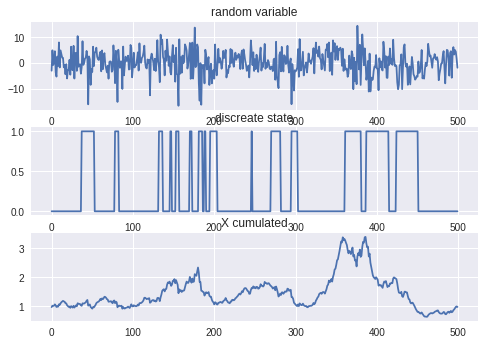

In [7]:
import matplotlib.pyplot as plt
plt.subplot(311)
plt.plot(X)
plt.title("random variable")
plt.subplot(312)
plt.plot(Z)
plt.title("discreate state")
plt.subplot(313)
plt.plot((1+0.01*X).cumprod())
plt.title("X cumulated")
plt.tight_layour()
plt.show()


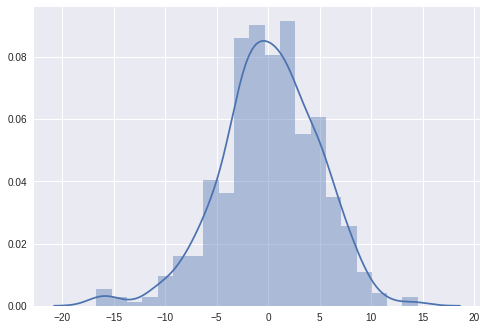

In [10]:
import seaborn as sns
sns.distplot(X)
plt.show()

# 디코드¶

## 관측된 히든 마코프 모형의 연속 확률 변수 값으로부터 내부의 이산 확률 변수 값을 추정하는 과정을 디코드(decode)라고 한다. 

## 디코드 알고리즘 중 가장 많이 사용되는 것은 Viterbi 알고리즘이다.

In [0]:
model2 = hmm.GaussianHMM(n_components =2 , n_iter = len(X)).fit(X)
model2

In [13]:
Z_hat = model2.decode(X)[1]

X_cum = (1+0.01*X).cumprod()

X_cum_hat = X_cum.copy()
print(X_cum_hat)
print("---------------------------------------------------------------")
print(Z_hat ==0)
X_cum_hat[Z_hat == 0] = np.nan 

[0.97012874 1.01833502 1.01037433 1.01821154 1.06543259 1.02737851
 0.97289035 0.99761155 0.98591947 1.0652356  1.046841   1.09863266
 1.13804452 1.16202539 1.18540603 1.16537073 1.15560566 1.10469225
 1.09997364 1.03372924 1.00444626 0.97694827 0.98926565 0.94426369
 1.0045542  0.97870188 0.95111771 1.01498524 0.95354448 0.9911861
 1.02971324 0.99818264 1.10320297 1.08716557 1.07969949 1.07474935
 1.03004145 1.01395205 1.10032976 1.0924143  1.09427451 1.11343981
 1.13652912 1.19046265 1.21634368 1.02019846 1.04671895 1.06173762
 0.97131795 0.94787252 0.91482751 0.97321324 0.96169852 1.00126681
 1.04405893 1.10668021 1.13368277 1.15046374 1.16419596 1.20126083
 1.25389322 1.21350276 1.27321424 1.24264533 1.278812   1.32832125
 1.32003047 1.29171422 1.24435808 1.23076752 1.15546677 1.16026122
 1.16790109 1.17385253 1.13390898 1.10332267 1.17948581 1.20007604
 1.10582358 1.15852163 1.13590691 0.96330799 1.01323375 1.02379064
 1.00462648 1.011049   1.0172453  0.91437395 0.97317489 0.92629

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


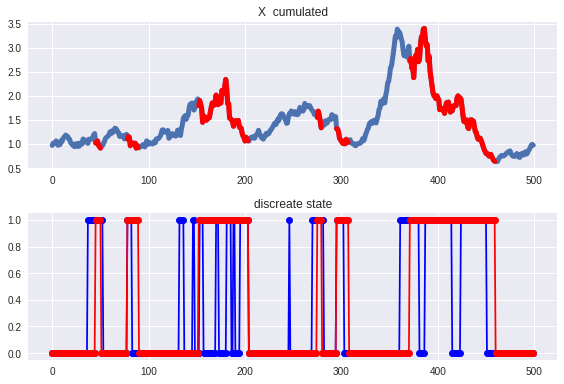

In [14]:
plt.subplot(211)
plt.plot(X_cum , lw= 5)
plt.plot(X_cum_hat , "r-", lw=5)
plt.title("X  cumulated")
plt.subplot(212)
plt.plot(Z,"bo-")
plt.plot(Z_hat ,"ro-")
plt.title("discreate state")
plt.tight_layout()
plt.show()